<a href="https://colab.research.google.com/github/charbells/1864093_ProcesamientoDeDatos/blob/main/1864093_Clase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Actividad Clase 1

###Nombre: Erick Charbel Lopez Salazar

###Matricula: 1864093






In [2]:
import gutenbergpy.textget

In [26]:
def obtener_libro(id = 345):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [27]:
libro_limpio, libro = obtener_libro()

In [28]:
libro_limpio[:1000]

b'\n\n\n\n                                DRACULA\n\n                                  _by_\n\n                              Bram Stoker\n\n                        [Illustration: colophon]\n\n                                NEW YORK\n\n                            GROSSET & DUNLAP\n\n                              _Publishers_\n\n      Copyright, 1897, in the United States of America, according\n                   to Act of Congress, by Bram Stoker\n\n                        [_All rights reserved._]\n\n                      PRINTED IN THE UNITED STATES\n                                   AT\n               THE COUNTRY LIFE PRESS, GARDEN CITY, N.Y.\n\n\n\n\n                                   TO\n\n                             MY DEAR FRIEND\n\n                               HOMMY-BEG\n\n\n\n\nContents\n\nCHAPTER I. Jonathan Harker\xe2\x80\x99s Journal\nCHAPTER II. Jonathan Harker\xe2\x80\x99s Journal\nCHAPTER III. Jonathan Harker\xe2\x80\x99s Journal\nCHAPTER IV. Jonathan Harker\xe2\x80\x

In [29]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
str_libro = libro_limpio.decode()
list_libro = str_libro.split("\n")
libro_filitrado = list(filter(None, list_libro))

In [31]:
def tokens(txt, idioma = 'english'):
    texto_limpio = re.sub(r'[^\w\s]', '', txt.lower())

    stop_words = set(stopwords.words(idioma))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [32]:
map_libro = list(map(tokens, libro_filitrado))

In [33]:
tokens = []
for token in map_libro:
    tokens.extend(token)
tokens[:20]

['dracula',
 '_by_',
 'bram',
 'stoker',
 'illustration',
 'colophon',
 'new',
 'york',
 'grosset',
 'dunlap',
 '_publishers_',
 'copyright',
 '1897',
 'united',
 'states',
 'america',
 'according',
 'act',
 'congress',
 'bram']

In [34]:
df = pd.DataFrame(tokens)
df = df.iloc[:1000]

In [49]:
import spacy
nlp = spacy.load("en_core_web_sm")

df[1] = df[0].apply(lambda x: nlp(x)[0].lemma_)

In [51]:
conteo_frecuencias = df[1].value_counts()
conteo_frecuencias

,count
1,
chapter,28
journal,14
go,14
know,14
diary,12
...,...
mountain,1
midst,1
moldavia,1


In [52]:
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias

,count
1,
chapter,28
journal,14
go,14
know,14
diary,12
...,...
mountain,1
midst,1
moldavia,1


In [53]:
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['lemma', 'conteo']
df_frecuencias

,lemma,conteo
0,chapter,28
1,journal,14
2,go,14
3,know,14
4,diary,12
...,...,...
584,mountain,1
585,midst,1
586,moldavia,1
587,border,1


<BarContainer object of 10 artists>

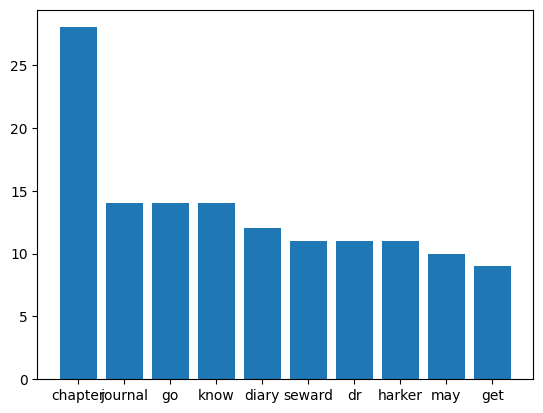

In [56]:
import matplotlib.pyplot as plt
plt.bar(df_frecuencias.iloc[:10].lemma, df_frecuencias.iloc[:10].conteo)